<a href="https://colab.research.google.com/github/ttcchub/tensorflow-studies/blob/main/Copy_of_%5BGB%5D_bootcamp_analytics_day2_h%26m_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## H&M EDA

1. Анализ данных
2. Система рекомендаций, основанная на похожести клиентов (Collaborative filtering)

<img src='https://upload.wikimedia.org/wikipedia/commons/5/53/H%26M-Logo.svg' width=500>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm

https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations

In [ ]:
!wget 'https://drive.google.com/uc?id=1R_v1aeFQGConcEwoVCWk79iJeZ6-xyKI' -O articles.csv

--2024-01-18 17:16:36--  https://drive.google.com/uc?id=1R_v1aeFQGConcEwoVCWk79iJeZ6-xyKI
Resolving drive.google.com (drive.google.com)... 142.250.141.101, 142.250.141.102, 142.250.141.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.141.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1R_v1aeFQGConcEwoVCWk79iJeZ6-xyKI [following]
--2024-01-18 17:16:36--  https://drive.usercontent.google.com/download?id=1R_v1aeFQGConcEwoVCWk79iJeZ6-xyKI
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28427845 (27M) [application/octet-stream]
Saving to: ‘articles.csv’

articles.csv        100%[===================>]  27.11M  34.6MB/s    in 0.8s    

2024-01-18 17:16:38 (34.6 MB/s)

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1wK-n8XBUc1-M-tAiJdkkSQcL2ajf5Lbm' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1wK-n8XBUc1-M-tAiJdkkSQcL2ajf5Lbm" -O customers.csv && rm -rf /tmp/cookies.txt

--2024-01-18 17:16:39--  https://docs.google.com/uc?export=download&confirm=&id=1wK-n8XBUc1-M-tAiJdkkSQcL2ajf5Lbm
Resolving docs.google.com (docs.google.com)... 142.251.2.139, 142.251.2.100, 142.251.2.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1wK-n8XBUc1-M-tAiJdkkSQcL2ajf5Lbm&export=download [following]
--2024-01-18 17:16:39--  https://drive.usercontent.google.com/download?id=1wK-n8XBUc1-M-tAiJdkkSQcL2ajf5Lbm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2427 (2.4K) [text/html]
Saving to: ‘customers.csv’

customers.csv       100%[===================>]   2.37K  --.-KB/s    in 0s      

2024

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jz2hHg7iwxSAnAisnlQyiPwV2a8ZG_sB' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1jz2hHg7iwxSAnAisnlQyiPwV2a8ZG_sB" -O transactions.csv && rm -rf /tmp/cookies.txt

--2024-01-18 17:16:40--  https://docs.google.com/uc?export=download&confirm=&id=1jz2hHg7iwxSAnAisnlQyiPwV2a8ZG_sB
Resolving docs.google.com (docs.google.com)... 142.251.2.139, 142.251.2.100, 142.251.2.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1jz2hHg7iwxSAnAisnlQyiPwV2a8ZG_sB&export=download [following]
--2024-01-18 17:16:40--  https://drive.usercontent.google.com/download?id=1jz2hHg7iwxSAnAisnlQyiPwV2a8ZG_sB&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2434 (2.4K) [text/html]
Saving to: ‘transactions.csv’

transactions.csv    100%[===================>]   2.38K  --.-KB/s    in 0s      

2

In [ ]:
articles = pd.read_csv("articles.csv")
customers = pd.read_csv("customers.csv")
transactions = pd.read_csv("transactions.csv")

## Articles

Эта таблица содержит все h&m артикулы.

> `article_id` : Уникальный идентификатор артикула   
> `prod_name` : Имя продукта <br>
> `product_type_name` : Тип товара   
> `index_name`: Подраздел  
> `index_group_name` : Раздел  
> `section_name`: Секция  
> `garment_group_name`: Категория товара  
> `detail_desc`: Детали  

In [ ]:
articles.head()

,article_id,prod_name,product_type_name,product_group_name,graphical_appearance_name,colour_group_name,index_name,index_group_name,section_name,garment_group_name,detail_desc
0,108775015,Strap top,Vest top,Garment Upper body,Solid,Black,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,Strap top,Vest top,Garment Upper body,Solid,White,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,Strap top (1),Vest top,Garment Upper body,Stripe,Off White,Ladieswear,Ladieswear,Womens Everyday Basics,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,OP T-shirt (Idro),Bra,Underwear,Solid,Black,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,OP T-shirt (Idro),Bra,Underwear,Solid,White,Lingeries/Tights,Ladieswear,Womens Lingerie,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


Таблица с количеством уникальных значений в каждой колонке

In [ ]:
for col in articles.columns:
    un_n = articles[col].nunique()
    print(f'no of unique {col}: {un_n}')

no of unique article_id: 105542
no of unique prod_name: 45875
no of unique product_type_name: 131
no of unique product_group_name: 19
no of unique graphical_appearance_name: 30
no of unique colour_group_name: 50
no of unique index_name: 10
no of unique index_group_name: 5
no of unique section_name: 56
no of unique garment_group_name: 21
no of unique detail_desc: 43404


**Анализ категории товара**

Divided - молодежная и более дешевая одежда

In [ ]:
articles['index_name'].value_counts()

Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: index_name, dtype: int64

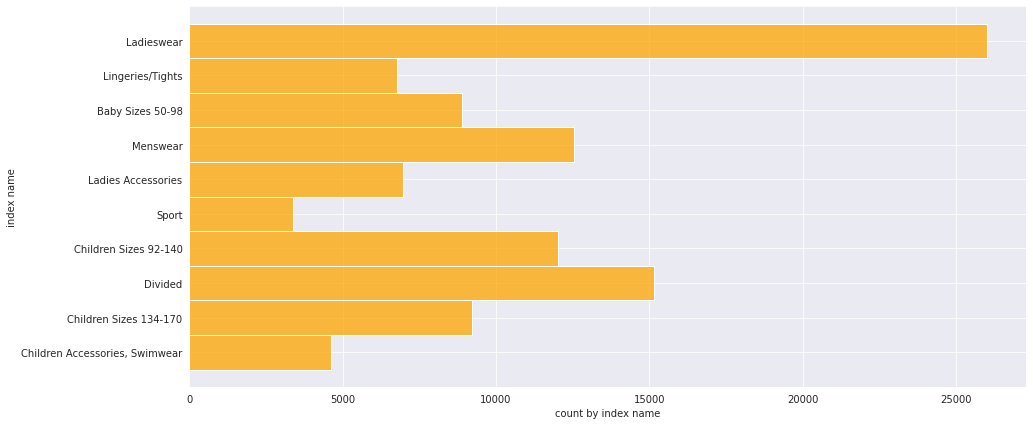

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name', color='orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

**Анализ категории товара в зависимости от раздела**

In [ ]:
articles[['garment_group_name', 'index_group_name']].head()

,garment_group_name,index_group_name
0,Jersey Basic,Ladieswear
1,Jersey Basic,Ladieswear
2,Jersey Basic,Ladieswear
3,"Under-, Nightwear",Ladieswear
4,"Under-, Nightwear",Ladieswear


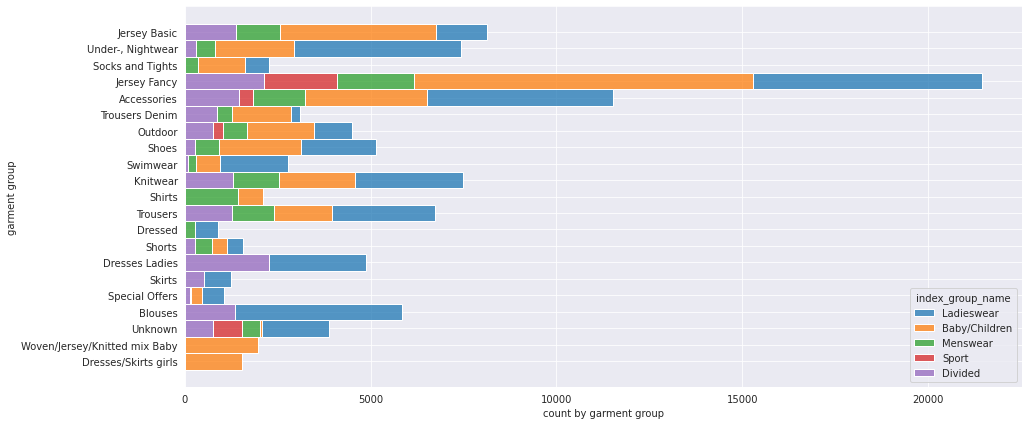

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

- Jersey fancy - самый популярный, особенно для женщин и детей (обычная базовая одежда)
- Аксессуары - вторая по популярности категория, скорее всего из-за своей стоимости

Можно обратить внимание, что раздел еще может делиться на подраздел

In [ ]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

Изучаем разнообразие именований товаров в каждой категории товара.

In [ ]:
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

**Какого типа товаров больше**

In [ ]:
top_item = articles.groupby(['product_type_name']).count()['article_id'].sort_values(ascending=False).iloc[:10]
top_item

product_type_name
Trousers    11169
Dress       10362
Sweater      9302
T-shirt      7904
Top          4155
Blouse       3979
Jacket       3940
Shorts       3939
Shirt        3405
Vest top     2991
Name: article_id, dtype: int64

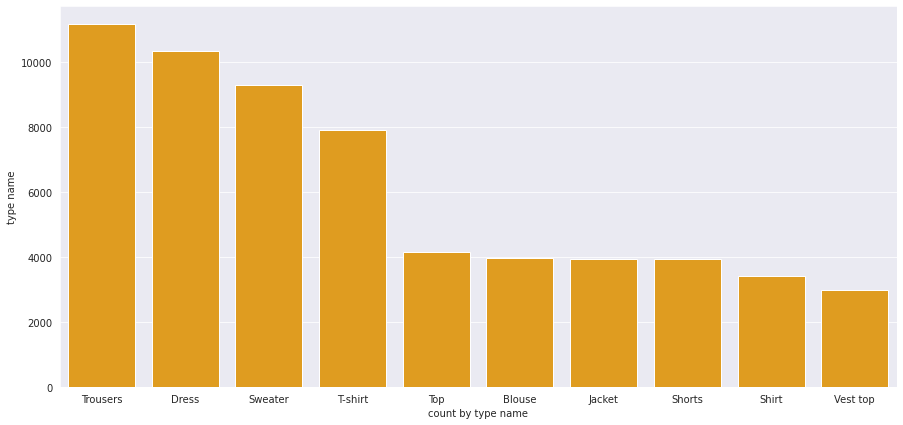

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.barplot(x=top_item.index, y=top_item.values, color='orange')
ax.set_xlabel('count by type name')
ax.set_ylabel('type name')
plt.show()

**В какой категории товаров больше**

In [ ]:
top_group = articles.groupby(['product_group_name']).count()['article_id'].sort_values(ascending=False).iloc[:10]
top_group

product_group_name
Garment Upper body    42741
Garment Lower body    19812
Garment Full body     13292
Accessories           11158
Underwear              5490
Shoes                  5283
Swimwear               3127
Socks & Tights         2442
Nightwear              1899
Unknown                 121
Name: article_id, dtype: int64

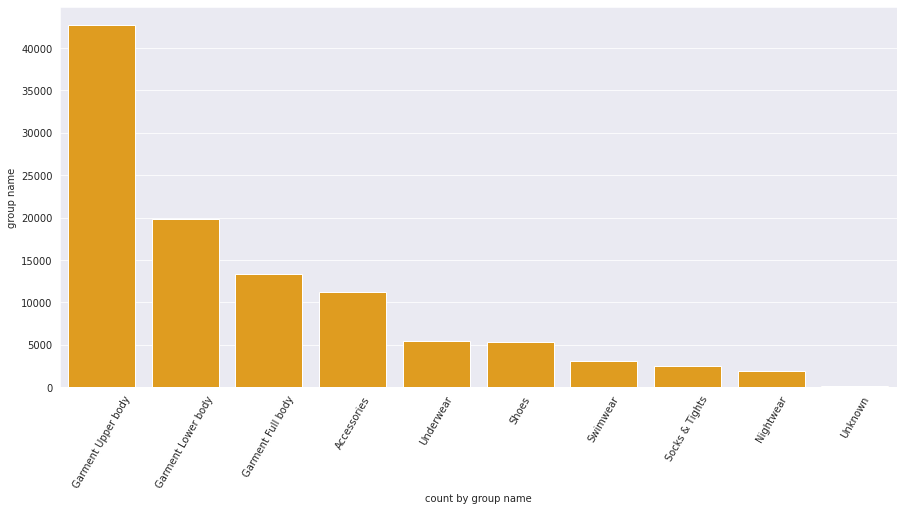

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=top_group.index, y=top_group.values, color='orange')
plt.xlabel('count by group name')
plt.ylabel('group name')
plt.xticks(np.arange(len(top_group.index)), top_group.index, rotation=60)
plt.show()

**Какой графический элемент присутствует чаще всего**

In [ ]:
top_graph = articles.groupby(['graphical_appearance_name']).count()['article_id'].sort_values(ascending=False).iloc[:10]
top_graph

graphical_appearance_name
Solid               49747
All over pattern    17165
Melange              5938
Stripe               4990
Denim                4842
Front print          3215
Placement print      3098
Check                2178
Colour blocking      1830
Lace                 1513
Name: article_id, dtype: int64

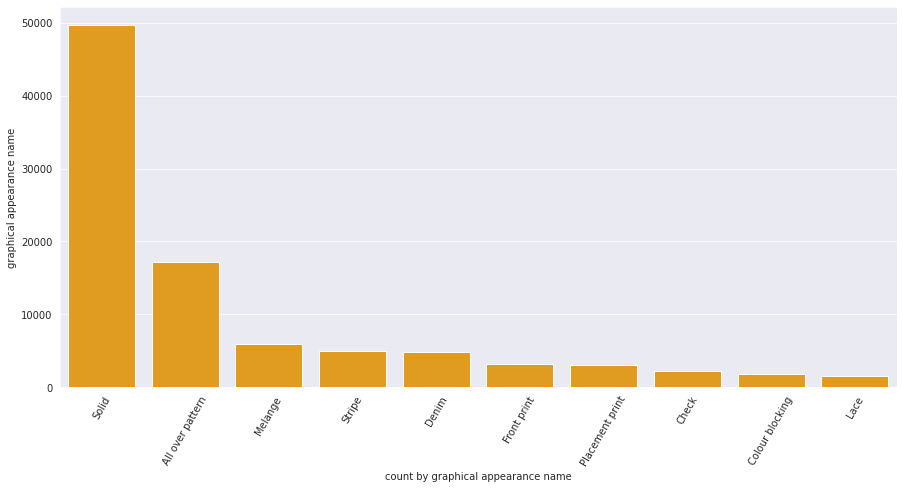

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=top_graph.index, y=top_graph.values, color='orange')
plt.xlabel('count by graphical appearance name')
plt.ylabel('graphical appearance name')
plt.xticks(np.arange(len(top_graph.index)), top_graph.index, rotation=60)
plt.show()

**Какой цвет присутствует чаще всего**

In [ ]:
top_color = articles.groupby(['colour_group_name']).count()['article_id'].sort_values(ascending=False).iloc[:10]
top_color

colour_group_name
Black             22670
Dark Blue         12171
White              9542
Light Pink         5811
Grey               4487
Light Beige        3356
Blue               3308
Red                3056
Light Blue         3012
Greenish Khaki     2767
Name: article_id, dtype: int64

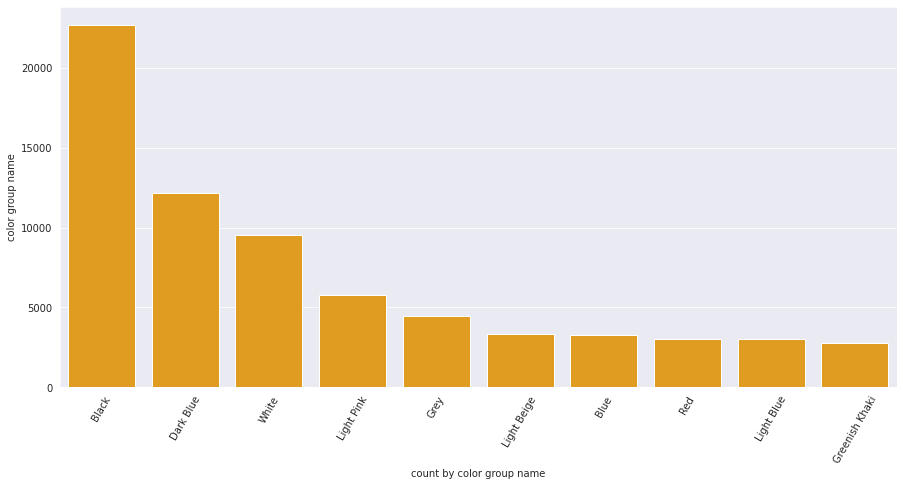

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x=top_color.index, y=top_color.values, color='orange')
plt.xlabel('count by color group name')
plt.ylabel('color group name')
plt.xticks(np.arange(len(top_color.index)), top_color.index, rotation=60)
plt.show()

## Customers


> `customer_id` : Уникальный идентификатор клиента  
> `Active` : 1 или пропуск     
> `club_member_status` : Статус в клубе    
> `fashion_news_frequency` : Как часто H&M может присылать новости клиенту    
> `age` : Возраст клиента    
> `postal_code` : Почтовый индекс клиента

In [ ]:
pd.options.display.max_rows = 50
customers.head()

,customer_id,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,ACTIVE,NONE,49.0000,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,ACTIVE,NONE,25.0000,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,ACTIVE,NONE,24.0000,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,ACTIVE,NONE,54.0000,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0000,ACTIVE,Regularly,52.0000,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
customers.shape

(1371980, 6)

Таблица с количеством уникальных значений в каждой колонке

In [ ]:
for col in customers.columns:
    un_n = customers[col].nunique()
    print(f'no of unique {col}: {un_n}')

no of unique customer_id: 1371980
no of unique Active: 1
no of unique club_member_status: 3
no of unique fashion_news_frequency: 4
no of unique age: 84
no of unique postal_code: 352899


Убедимся, что нет дубликатов в id клиентов

In [ ]:
customers.shape[0] - customers['customer_id'].nunique()

0

У нас есть очень большое количество клиентов на одном индексе - 120303. Это может быть либо какой-то почтовый индекс, которым заполняют пропуски или же это может огромный распределительный центр или постамат

In [ ]:
data_postal = customers.groupby('postal_code', as_index=False).count()[['postal_code', 'customer_id']].sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156


При этом возраста, статус в клубе различны, как и айди клиента

In [ ]:
data_postal['postal_code'].iloc[0]

'2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'

In [ ]:
customers[customers['postal_code'] == '2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c'].head(5)

,customer_id,Active,club_member_status,fashion_news_frequency,age,postal_code
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,NaN,ACTIVE,NONE,20.0000,2c29ae653a9282cce4151bd87643c907644e09541abc28...
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,NaN,ACTIVE,NONE,20.0000,2c29ae653a9282cce4151bd87643c907644e09541abc28...
11,000097d91384a0c14893c09ed047a963c4fc6a5c021044...,NaN,ACTIVE,NONE,31.0000,2c29ae653a9282cce4151bd87643c907644e09541abc28...
14,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,1.0000,ACTIVE,Regularly,29.0000,2c29ae653a9282cce4151bd87643c907644e09541abc28...


**Анализ вораста клиентов**

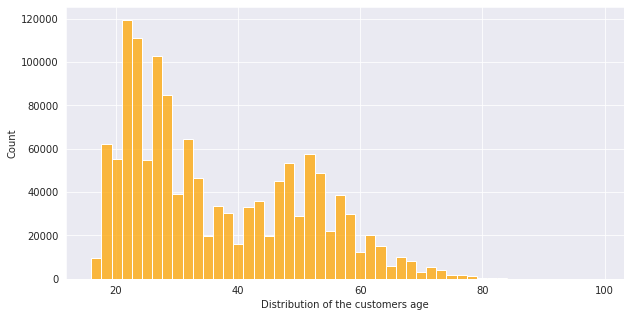

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt


sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))

ax = sns.histplot(data=customers, x='age', bins=50, color='orange')
ax.set_xlabel('Distribution of the customers age')
plt.show()

**Анализ статуса в клубе H&M**

Практически все клиенты имеют активный статус, некоторые из них только начинают его активировать и совсем маленькая доля людей, которые вышли из клуба.

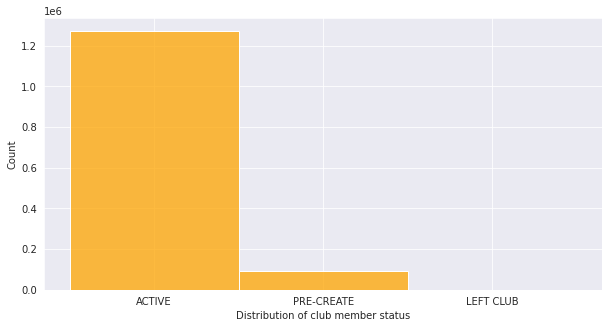

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='club_member_status', color='orange')
ax.set_xlabel('Distribution of club member status')
plt.show()

**Анализ частоты отправки новостей**

In [ ]:
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [ ]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly'])]

,customer_id,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,ACTIVE,NONE,49.0000,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,ACTIVE,NONE,25.0000,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,ACTIVE,NONE,24.0000,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,ACTIVE,NONE,54.0000,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
...,...,...,...,...,...,...
1371968,ffff4c4e8b57b633c1ddf8fbd53db16b962cf831baf9ed...,NaN,ACTIVE,NONE,40.0000,3b4a300713f8b142836a67caa5b6d5b3f10a7650c06820...
1371972,ffff8f9ecdce722b5bab97fff68a6d1866492209bfe524...,NaN,ACTIVE,NONE,52.0000,0de9d1ec7dc785301ca5fbe8949cfc2cfbd77e7a807270...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,ACTIVE,NONE,24.0000,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,ACTIVE,NONE,21.0000,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...


In [ ]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
customers['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

In [ ]:
pie_data = customers[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()
pie_data

,customer_id
fashion_news_frequency,
Monthly,842
None,893722
Regularly,477416


Клиенты предпочитают не получать никаких новостей.

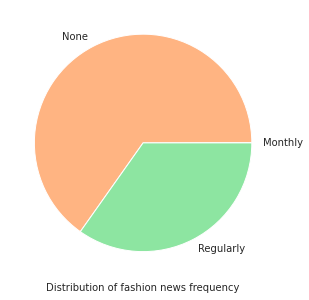

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))

colors = sns.color_palette('pastel')
ax.pie(pie_data.customer_id, labels=pie_data.index, colors = colors)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of fashion news frequency')
plt.show()

## Transactions

> `t_dat` : Время покупки    
> `customer_id` : Уникальный идентификатор клиента    
> `article_id` : Уникальный идентификатор артикула  
> `price` : Стоимость покупок    
> `sales_channel_id` : Канал продажи

In [ ]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


**Поиск выбросов в стоимости покупок**

In [ ]:
pd.set_option('display.float_format', '{:.4f}'.format)
transactions.describe()['price']

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

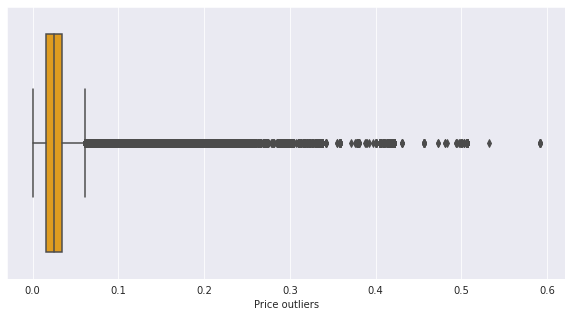

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=transactions, x='price', color='orange')
ax.set_xlabel('Price outliers')
plt.show()

Но кстати, анализировать стоимости внутри групп - это более правильно, т.к. цены аксессуаров и брюк могут отличаться.

In [ ]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]
articles_for_merge.head()

,article_id,prod_name,product_type_name,product_group_name,index_name
0,108775015,Strap top,Vest top,Garment Upper body,Ladieswear
1,108775044,Strap top,Vest top,Garment Upper body,Ladieswear
2,108775051,Strap top (1),Vest top,Garment Upper body,Ladieswear
3,110065001,OP T-shirt (Idro),Bra,Underwear,Lingeries/Tights
4,110065002,OP T-shirt (Idro),Bra,Underwear,Lingeries/Tights


In [ ]:
articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')
articles_for_merge

,customer_id,article_id,price,t_dat,prod_name,product_type_name,product_group_name,index_name
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2018-09-20,Atlanta Push Body Harlow,Underwear body,Underwear,Lingeries/Tights
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2018-09-20,Rae Push (Melbourne) 2p,Bra,Underwear,Lingeries/Tights
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2018-09-20,Inca Jumper,Sweater,Garment Upper body,Divided
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear
...,...,...,...,...,...,...,...,...
31788319,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.0593,2020-09-22,POPPY PU SHIRT DRESS,Dress,Garment Full body,Divided
31788320,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.0424,2020-09-22,FENNEL SHIRT DRESS,Unknown,Unknown,Divided
31788321,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.0432,2020-09-22,Winter shopper,Bag,Accessories,Ladies Accessories
31788322,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.0068,2020-09-22,Class Aligator Ring Pack,Ring,Accessories,Ladies Accessories


Здесь мы видим выбросы для стоимостей по группам, особенно в Lower/Upper/Full body.

Да даже в аксессуарах есть очень большая стоимость.

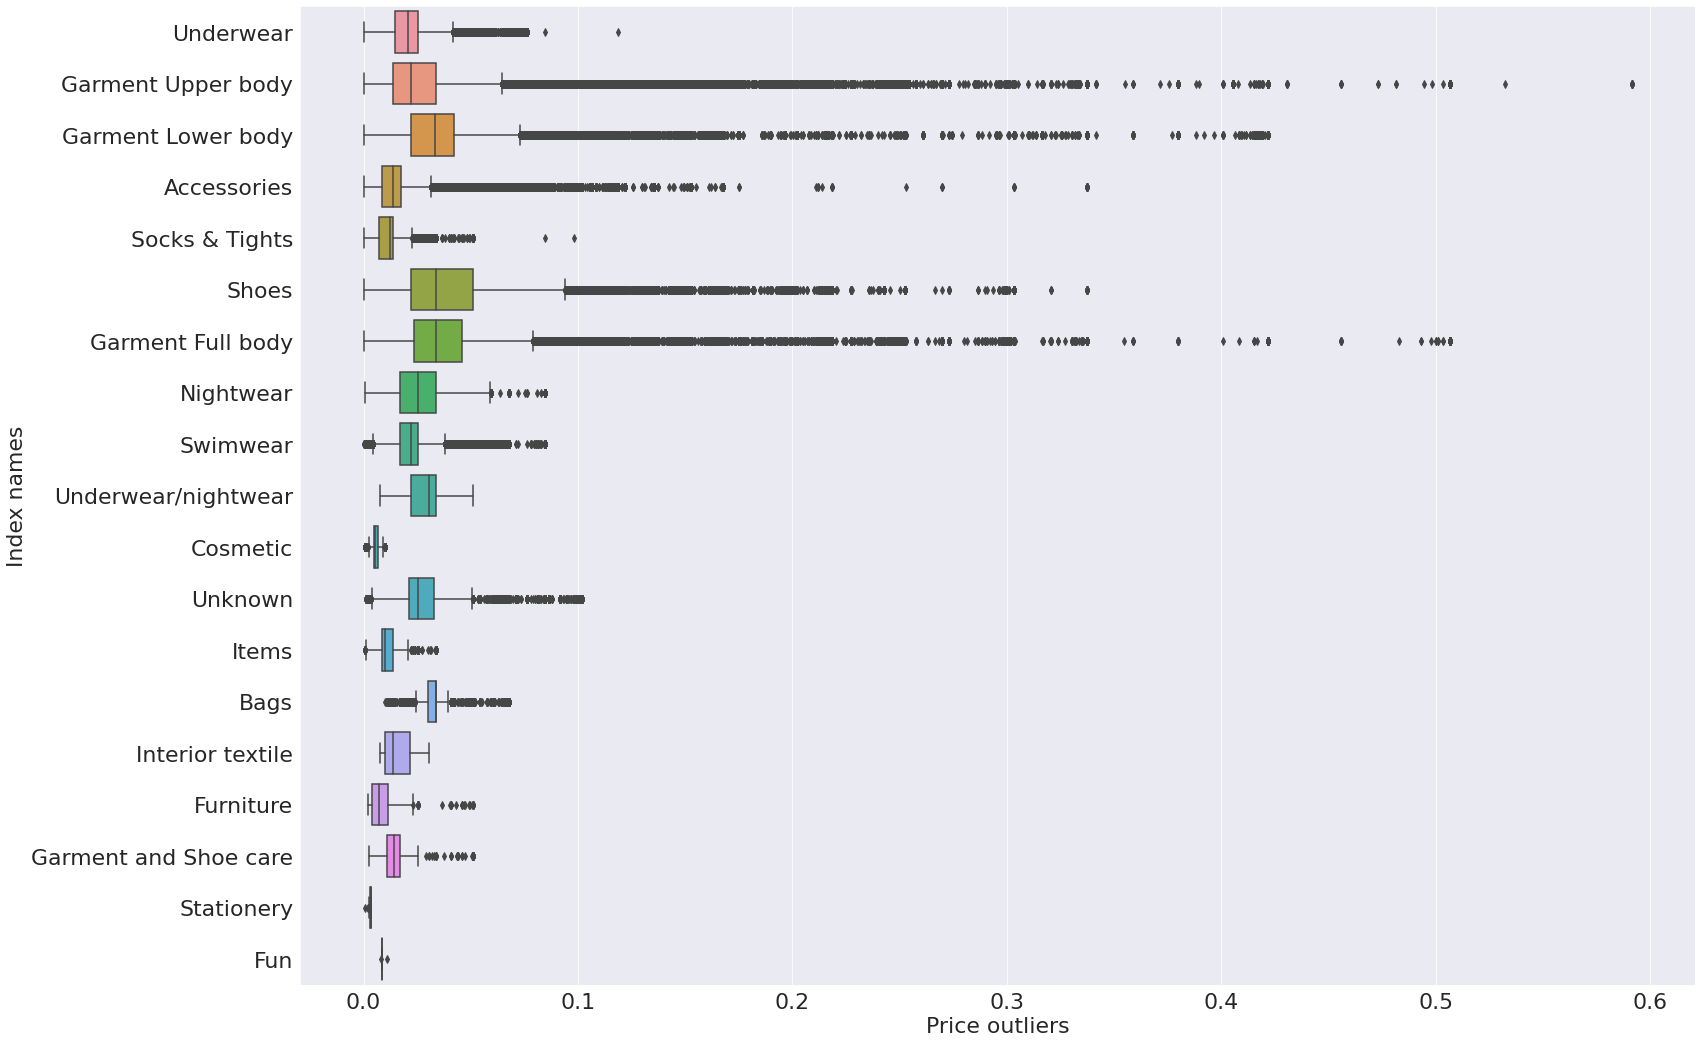

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

Теперь поизучаем стоимости в категории аксессуаров. И попытаемся найти причину такой разной цены

Большие выбросы можно найти в сумках. Также в шарфах и других аксессуарах.

In [ ]:
accessories = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories']
accessories.head()

,customer_id,article_id,price,t_dat,prod_name,product_type_name,product_group_name,index_name
38,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,553139001,0.0339,2018-09-20,Jenner waist belt,Belt,Accessories,Ladies Accessories
39,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,553139001,0.0339,2018-09-20,Jenner waist belt,Belt,Accessories,Ladies Accessories
54,002b3c0a44a22c45a8d62ea9d2b88d1a89e335f8b84003...,673531001,0.0085,2018-09-20,Keyring fluff,Other accessories,Accessories,"Children Accessories, Swimwear"
62,00401a367c5ac085cb9d4b77c56f3edcabf25153615db9...,633675001,0.0102,2018-09-20,A-band unicorn PU,Hair/alice band,Accessories,"Children Accessories, Swimwear"
82,005c9fb2ba6c49b2098a662f64a9124ef95cbec5fcf4eb...,560783010,0.0051,2018-09-20,Polly pencil case,Bag,Accessories,Divided


In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(20, 18))
ax = sns.boxplot(data=accessories, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

plt.show()

NameError: name 'sns' is not defined

Товар с самой высокой стоимостью находится в женском разделе, а вот с самой низкой стоимостью в детском

In [ ]:
articles_index = articles_for_merge[['index_name', 'price']].groupby('index_name').mean()
articles_index = articles_index.sort_values('price')
articles_index

,price
index_name,
Baby Sizes 50-98,0.0175
Children Sizes 92-140,0.0175
"Children Accessories, Swimwear",0.0176
Lingeries/Tights,0.0208
Children Sizes 134-170,0.0219
Ladies Accessories,0.0240
Divided,0.0265
Menswear,0.0275
Sport,0.0288


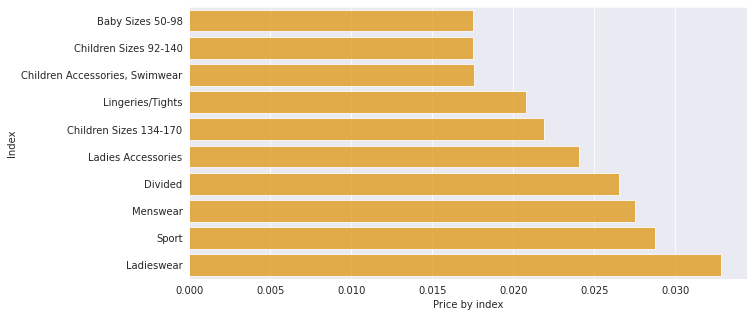

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

Канцелярские товары имеют наименьшую стоимость, а самая высокая стоисоть у обуви

In [ ]:
articles_index = articles_for_merge[['product_group_name', 'price']].groupby('product_group_name').mean()
articles_index = articles_index.sort_values('price')
articles_index

,price
product_group_name,
Stationery,0.0032
Cosmetic,0.0058
Fun,0.0089
Furniture,0.0096
Items,0.0113
Socks & Tights,0.0114
Accessories,0.0156
Interior textile,0.0164
Garment and Shoe care,0.0175


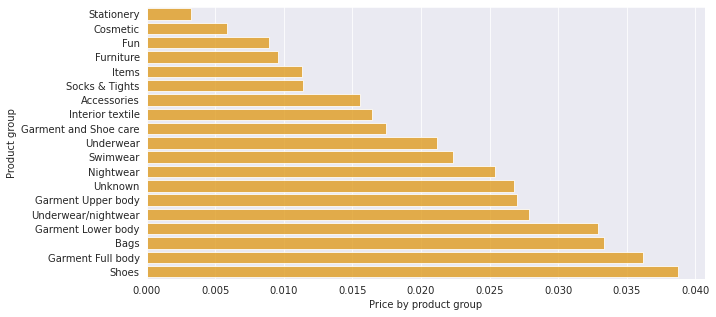

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

**Анализ стоимости от времени**

In [ ]:
articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'])

In [ ]:
articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == 'Shoes']
series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean()
series_mean

,price
t_dat,
2018-09-30,0.0434
2018-10-31,0.0417
2018-11-30,0.0455
2018-12-31,0.0442
2019-01-31,0.0438
2019-02-28,0.0405
2019-03-31,0.0402
2019-04-30,0.0375
2019-05-31,0.0366


In [ ]:
series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
series_std

,price
t_dat,
2018-09-30,0.0277
2018-10-31,0.0268
2018-11-30,0.0265
2018-12-31,0.0277
2019-01-31,0.0271
2019-02-28,0.0232
2019-03-31,0.0201
2019-04-30,0.0199
2019-05-31,0.0202


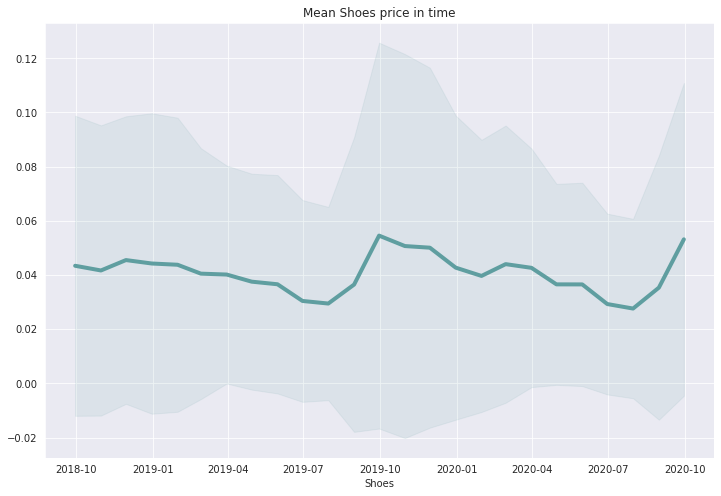

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12, 8))

ax.plot(series_mean, linewidth=4, color='cadetblue')
ax.fill_between(series_mean.index,
               (series_mean.values - 2*series_std.values).ravel(),
               (series_mean.values + 2*series_std.values).ravel(),
               color='cadetblue', alpha=.1)

ax.set_title(f'Mean Shoes price in time')
ax.set_xlabel('month')
ax.set_xlabel(f'Shoes');

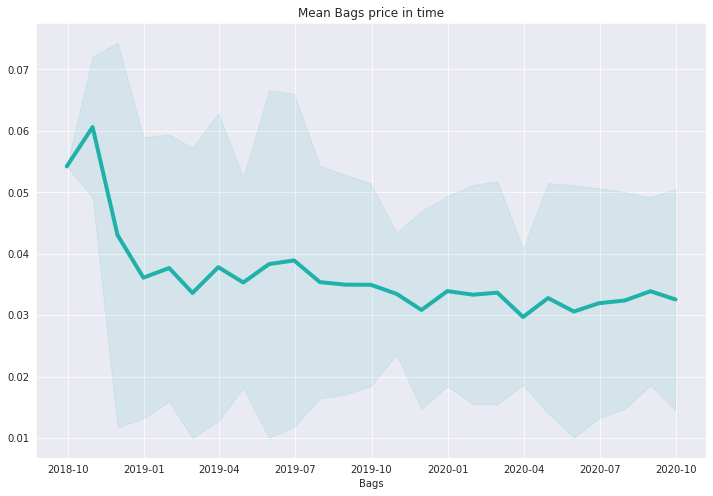

In [ ]:
articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == 'Bags']
series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean()
series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)

f, ax = plt.subplots(1,1, figsize=(12, 8))

ax.plot(series_mean, linewidth=4, color='lightseagreen')
ax.fill_between(series_mean.index,
               (series_mean.values-2*series_std.values).ravel(),
               (series_mean.values+2*series_std.values).ravel(),
               color='lightseagreen', alpha=.1)

ax.set_title(f'Mean Bags price in time')
ax.set_xlabel('month')
ax.set_xlabel(f'Bags');

## Система рекомендаций (Collaborative Filtering)

<img src='https://www.researchgate.net/profile/Lionel-Ngoupeyou-Tondji/publication/323726564/figure/fig5/AS:631605009846299@1527597777415/Content-based-filtering-vs-Collaborative-filtering-Source.png' width=700>

In [ ]:
%%time
transactions.customer_id.unique()

CPU times: user 8.41 s, sys: 154 ms, total: 8.56 s
Wall time: 8.51 s


array(['000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318',
       '00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2',
       '00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4c73235dccbbc132280',
       ...,
       'fece2f68864c311a0b5208e2eb735b3dcde7e41461d327bdd033014a27168ce8',
       'fee56cc5315dafb35a4490ccc6f711092cae913550c83251955178bdd1bc6be3',
       'ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a7851941508cce49f5dfa469'],
      dtype=object)

In [ ]:
transactions['customer_id_cat'] = transactions.customer_id.astype('category')

In [ ]:
%%time
transactions.customer_id_cat.unique()

CPU times: user 247 ms, sys: 710 µs, total: 248 ms
Wall time: 249 ms


['000058a12d5b43e67d225668fa1f8d618c13dc232df0c..., '00007d2de826758b65a93dd24ce629ed66842531df669..., '00083cda041544b2fbb0e0d2905ad17da7cf1007526fb..., '0008968c0d451dbc5a9968da03196fe20051965edde74..., '000aa7f0dc06cd7174389e76c9e132a67860c5f65f970..., ..., 'fe99a0069d6b3c64c2707d0ce53b9311540917471d82d..., 'fecc5f77b5f7ee4570efde9ab05ec94d0de2bf80efb4f..., 'fece2f68864c311a0b5208e2eb735b3dcde7e41461d32..., 'fee56cc5315dafb35a4490ccc6f711092cae913550c83..., 'ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a7851...]
Length: 1362281
Categories (1362281, object): [,
                               '00000dbacae5abe5e23885899a1fa44253a17956c6d1c...,
                               '0000423b00ade91418cceaf3b26c6af3dd342b51fd051...,
                               '000058a12d5b43e67d225668fa1f8d618c13dc232df0c...,
                               '00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd..., ...,
                               'ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab...,
                    

In [ ]:
customer_ids_1k = transactions['customer_id_cat'].unique()[:1000]
customer_dict = {id: i for i, id in enumerate(customer_ids_1k)}
len(customer_dict)

1000

In [ ]:
transactions_small = transactions[transactions['customer_id_cat'].isin(customer_ids_1k)].copy()
transactions_small.head()

,t_dat,customer_id,article_id,price,sales_channel_id,customer_id_cat
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2,00007d2de826758b65a93dd24ce629ed66842531df6699...
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2,00007d2de826758b65a93dd24ce629ed66842531df6699...
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2,00007d2de826758b65a93dd24ce629ed66842531df6699...


In [ ]:
tqdm.pandas()

def replace(x):
    try:
        res = customer_dict[x.customer_id_cat]
    except Exception as e:
        print(e)
        res = -1
    return res


transactions_small['customer_id'] = transactions_small.progress_apply(replace, axis=1)
transactions_small.head()

100%|██████████| 72374/72374 [00:03<00:00, 22328.48it/s]


,t_dat,customer_id,article_id,price,sales_channel_id,customer_id_cat
0,2018-09-20,0,663713001,0.0508,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
1,2018-09-20,0,541518023,0.0305,2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...
2,2018-09-20,1,505221004,0.0152,2,00007d2de826758b65a93dd24ce629ed66842531df6699...
3,2018-09-20,1,685687003,0.0169,2,00007d2de826758b65a93dd24ce629ed66842531df6699...
4,2018-09-20,1,685687004,0.0169,2,00007d2de826758b65a93dd24ce629ed66842531df6699...


In [ ]:
transactions_small['customer_id'].value_counts()

218    1157
990    1059
379     756
566     652
988     572
       ... 
155       1
382       1
432       1
22        1
712       1
Name: customer_id, Length: 1000, dtype: int64

In [ ]:
grouped = transactions_small.groupby(['customer_id', 'article_id']).count()['sales_channel_id']
grouped

customer_id  article_id
0            351484002     2
             541518023     1
             578020002     1
             663713001     2
             723529001     1
                          ..
999          861121001     1
             861847005     1
             862167002     2
             863000005     1
             863001001     1
Name: sales_channel_id, Length: 60252, dtype: int64

In [ ]:
customer_item_matrix = grouped.unstack('article_id')
customer_item_matrix

article_id,108775015,108775044,108775051,110065001,110065011,111565001,111586001,111593001,111609001,116379047,...,941005001,942064001,942187001,944506001,946282001,946748003,946748004,947060001,947509001,949198001
customer_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
customer_item_matrix.shape

(1000, 28632)

In [ ]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix.head()

article_id,108775015,108775044,108775051,110065001,110065011,111565001,111586001,111593001,111609001,116379047,...,941005001,942064001,942187001,944506001,946282001,946748003,946748004,947060001,947509001,949198001
customer_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Косинусная похожесть

<img src='https://drive.google.com/uc?id=1sp8Hfr1H8YKdo6KQHhvK42VPtzzJJczk'>

<img src='https://i.stack.imgur.com/36r1U.png'>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(customer_item_matrix, customer_item_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.01173631],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.01173631, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
cosine_sim.shape

(1000, 1000)

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim)

cosine_sim_df.columns = customer_item_matrix.index

cosine_sim_df['customer_id'] = customer_item_matrix.index
cosine_sim_df = cosine_sim_df.set_index('customer_id')

cosine_sim_df.head()

customer_id,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
customer_id,,,,,,,,,,,,,,,,,,,,,
0,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1226,0.0000,0.0000,0.0000
1,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0151,0.0000,0.0122,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0117
2,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0082,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,1.0000,0.0221,0.0000,0.0000,0.0215,0.0000,0.0000,...,0.0105,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0221,1.0000,0.0264,0.0000,0.0000,0.0000,0.0438,...,0.0066,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0566,0.0000,0.0000


In [ ]:
# На примере эталонного покупателя находим тех покупателей, которые близки к нему по косинусной мере
cosine_sim_df.loc[4].sort_values(ascending=False)

customer_id
4     1.0000
899   0.1443
460   0.1179
101   0.1000
972   0.0925
       ...  
363   0.0000
364   0.0000
365   0.0000
367   0.0000
999   0.0000
Name: 4, Length: 1000, dtype: float64

In [ ]:
# Определяем перечень уникальных покупок нашего эталонного покупателя
A = customer_item_matrix.loc[4]
items_bought_by_A = A[A > 0].index.tolist()
items_bought_by_A

[377277001,
 501820043,
 553139001,
 589017001,
 607983004,
 631848002,
 640639001,
 663498003,
 664421002,
 671505001,
 674681001,
 676827002,
 680187001,
 680912006,
 680912009,
 685687002,
 692454002,
 693497001,
 700819006,
 706016001,
 706016002,
 706016003,
 713349001,
 717490002,
 728162001,
 733044001,
 743049002,
 748355006,
 758049001,
 758050001,
 758060001,
 758064001,
 796210001,
 851996001,
 868164002,
 903309001]

In [ ]:
# Определяем перечень уникальных покупок покупателя наиболее близкого к нашему
B = customer_item_matrix.loc[899]
items_bought_by_B = B[B > 0].index.tolist()
items_bought_by_B

[595779011,
 705988005,
 708379004,
 713700001,
 718623005,
 746329003,
 758040001,
 758043001,
 758049001,
 758050001,
 758064001,
 758125001]

In [ ]:
# Отбираем те покупки, которые есть у близкого к нашему покупателю, но нет у нашего покупателя
items_to_recommend_to_A = set(items_bought_by_B) - set(items_bought_by_A)
items_to_recommend_to_A

{595779011,
 705988005,
 708379004,
 713700001,
 718623005,
 746329003,
 758040001,
 758043001,
 758125001}

In [ ]:
# Выводим перечень товаров, рекомендованных для нашего эталонного покупателя
articles[articles['article_id'].isin(items_to_recommend_to_A)][['article_id', 'prod_name', 'product_type_name']]

,article_id,prod_name,product_type_name
21890,595779011,Offy sweater,Sweater
53880,705988005,Molly HW Ankle TRS,Trousers
54760,708379004,Simone,Top
56254,713700001,VERA LACE TOP,Blouse
58066,718623005,PHILIPPA SHIRT,Shirt
66030,746329003,Andy skirt,Skirt
69757,758040001,LS Emmy Padded Triangle Top,Bikini top
69758,758043001,LS Emmy Tanga,Swimwear bottom
69771,758125001,LS Sarong,Sarong
